# Importando Dados

In [1]:
import pickle

In [2]:
with open('credito.pkl', 'rb') as f:
    X_credito_treino, y_credito_treino, X_credito_teste, y_credito_teste = pickle.load(f)

In [3]:
X_credito_treino.shape, y_credito_treino.shape

((22806, 3), (22806,))

# Treinamento do Modelo

In [4]:
from sklearn.tree import DecisionTreeClassifier

In [5]:
dtc_credito = DecisionTreeClassifier(criterion='entropy', random_state=0)
dtc_credito.fit(X_credito_treino, y_credito_treino)

DecisionTreeClassifier(criterion='entropy', random_state=0)

# Previsão Modelo

In [6]:
previsoes = dtc_credito.predict(X_credito_teste)

In [7]:
previsoes

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [8]:
y_credito_teste

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

# Métricas do Modelo

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [10]:
accuracy_score(y_credito_teste, previsoes)

0.8149360613810742

In [11]:
confusion_matrix(y_credito_teste, previsoes)

array([[6868,  876],
       [ 933, 1098]], dtype=int64)

In [13]:
print(classification_report(y_credito_teste, previsoes))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      7744
           1       0.56      0.54      0.55      2031

    accuracy                           0.81      9775
   macro avg       0.72      0.71      0.72      9775
weighted avg       0.81      0.81      0.81      9775



# Balanceamento Dados

<AxesSubplot:ylabel='count'>

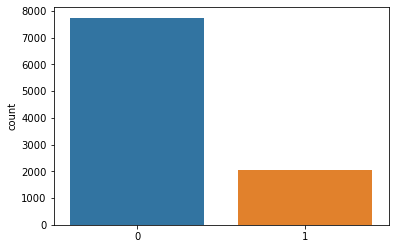

In [17]:
import seaborn as sns 
sns.countplot(x = y_credito_teste)

In [18]:
!pip install imbalanced-learn

In [19]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)

In [20]:
X_res_treino, y_res_treino = sm.fit_resample(X_credito_treino, y_credito_treino)

<AxesSubplot:ylabel='count'>

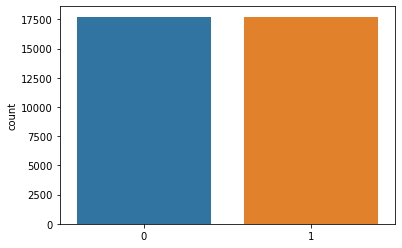

In [21]:
sns.countplot(x = y_res_treino)

# Treinamento Modelo 2

In [23]:
dtc_credito2 = DecisionTreeClassifier(criterion='entropy', random_state=0)
dtc_credito2.fit(X_res_treino, y_res_treino)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [24]:
previsoes2 = dtc_credito2.predict(X_credito_teste)

In [25]:
accuracy_score(y_credito_teste, previsoes2)

0.7773913043478261

In [26]:
confusion_matrix(y_credito_teste, previsoes2)

array([[6436, 1308],
       [ 868, 1163]], dtype=int64)

# Utilizando Gráficos

In [27]:
from yellowbrick.classifier import ConfusionMatrix

0.8149360613810742

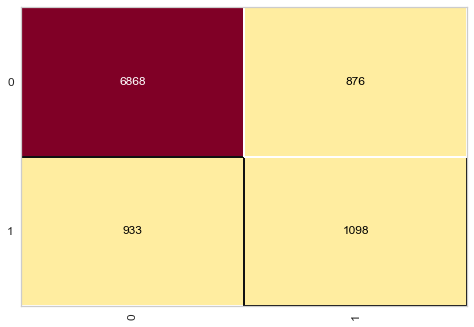

In [28]:
cm = ConfusionMatrix(dtc_credito)
cm.fit(X_credito_treino, y_credito_treino)
cm.score(X_credito_teste, y_credito_teste)